In [13]:
from time import time_ns
import numpy as np
import scipy.linalg as la
import quimb.tensor as qtn
import matplotlib.pyplot as plt
from decoder.sweepline import sweepline_contract

In [14]:
a1 = np.random.rand(2, 3)
t1 = qtn.Tensor(a1, ['a', 'b'])
a2 = np.random.rand(3, 1000, 50).astype(float)
t2 = qtn.Tensor(a2, ['b', 'c', 'd'])
a3 = np.random.rand(1000, 50).astype(float)
t3 = qtn.Tensor(a3, ['c', 'd'])

tensor_network = t1 & t2 & t3

coords = [(0, 0), (0, 1), (0, 2)]

In [15]:
bonds = []
norms = []
times_sweep = []
times_builtin = []
for max_bond in range(1, 150):
    time_start = time_ns()
    result = sweepline_contract(tensor_network, coords, max_bond, 'k')
    time_sweep_end = time_ns()
    builtin_result = tensor_network.contract()
    time_builtin_end = time_ns()
    assert result.shape == builtin_result.data.shape
    result_reshaped = result.data.reshape(result.data.size)
    builtin_reshaped = builtin_result.data.reshape(builtin_result.data.size)
    bonds.append(max_bond)
    norms.append(la.norm(result_reshaped - builtin_reshaped))
    times_sweep.append(time_sweep_end - time_start)
    times_builtin.append(time_builtin_end - time_sweep_end)

Text(0, 0.5, 'absolute distance from exact result')

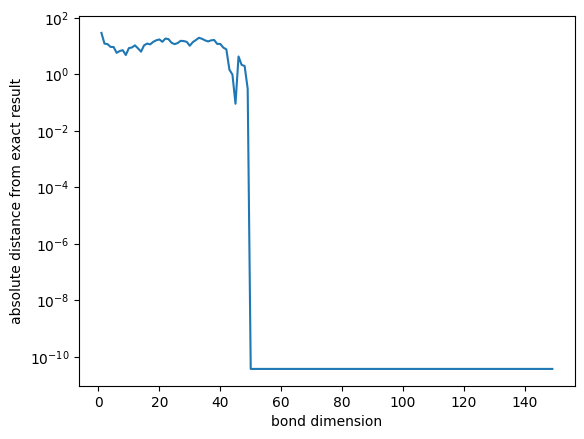

In [16]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(bonds, norms)
ax.set_xlabel('bond dimension')
ax.set_ylabel('absolute distance from exact result')

Text(0, 0.5, 'Time to contract')

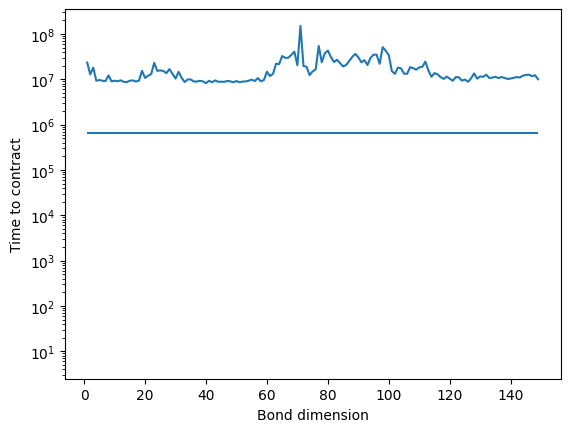

In [18]:
avg_builtin_time = np.average(np.array(times_builtin))

fig2, ax2 = plt.subplots()
ax2.set_yscale('log')
ax2.plot(bonds, times_sweep)
ax2.hlines(avg_builtin_time, np.min(bonds), np.max(bonds))
ax2.set_xlabel('Bond dimension')
ax2.set_ylabel('Time to contract (ns)')